In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv("../data/processed data/review_sentiment.csv")

In [3]:
reviews.head()

,productID,reviewerID,reviewerName,reviewText,rating,reviewLen,compound,neg,pos,neu,polarity,subjectivity,flair_sentiment,flair_scaled,Liked,Liked_tb,Liked_va
0,B00009W3PA,A1AHW6I678O6F2,kevin.,good item,5,2,0.4404,0.0,0.744,0.256,0.700000,0.600000,0.8820,0.038867,Liked,Liked,Liked
1,B0015UGPWQ,A1AHW6I678O6F2,kevin.,very nice product,5,3,0.4754,0.0,0.607,0.393,0.780000,1.000000,0.9863,0.038917,Liked,Liked,Liked
2,B001769IVI,A1AHW6I678O6F2,kevin.,a must for washers,5,4,0.0000,0.0,0.000,1.000,0.000000,0.000000,0.9998,0.038923,Liked,Not Liked,Not Liked
3,B00009W3PA,A8R48NKTGCJDQ,CDBrannom,Fit my new LG dryer perfectly.,5,6,0.7717,0.0,0.626,0.374,0.512121,0.618182,0.9998,0.038923,Liked,Liked,Liked
4,B0015UGPWQ,A8R48NKTGCJDQ,CDBrannom,Fits perfectly,5,2,0.6369,0.0,0.808,0.192,1.000000,1.000000,0.9975,0.038922,Liked,Liked,Liked


# Knn model

In [4]:
# Using rating given by the users for the matrix
user_prod_matrix = reviews.pivot(index='reviewerID', columns='productID', values='rating')
user_prod_matrix.fillna(0, inplace=True)

# Using the sentiment analysis text blob score for the matrix
user_prod_matrix_tb = reviews.pivot(index='reviewerID', columns='productID', values='polarity')
user_prod_matrix_tb.fillna(0, inplace=True)

user_prod_matrix.head(2)

productID,B00009W3PA,B0006GVNOA,B000N6302Q,B000NCTOUM,B000VL060M,B000XXWOGW,B000XXYUSM,B00126NABC,B0014CN8Y8,B0015UGPWQ,...,B008YDSH6E,B00AHR3IG4,B00CW0O1EW,B00DM8J11Q,B00DM8JA7Q,B00DM8KQ2Y,B00JGTUQJ6,B00MGMWTQS,B00P9C66PM,B00W4YKCGC
reviewerID,,,,,,,,,,,,,,,,,,,,,
A11SCLK8GDDN3C,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
A13391AZAFJ67K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [5]:
prod_user_matrix = user_prod_matrix.T
prod_user_matrix.head(2)
prod_user_matrix_tb = user_prod_matrix_tb.T

In [6]:
prod_user_matrix.shape

(32, 46)

<b> knn for user rating</b>

In [7]:
# knn for user rating
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(prod_user_matrix)
A = model_knn.kneighbors_graph(prod_user_matrix)
A = A.toarray()
#query_index = np.random.choice(prod_user_matrix.shape[0])
query_index = 25
distances, indices = model_knn.kneighbors(np.array(prod_user_matrix.iloc[query_index,:]).reshape(1,-1), n_neighbors = 6)
distances

array([[1.11022302e-16, 4.52277442e-01, 6.00000000e-01, 6.00000000e-01,
        6.06250385e-01, 6.34851628e-01]])

In [8]:
A.shape

(32, 32)

In [9]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(prod_user_matrix.index[query_index]))
    else:
        print('{0}:{1}, with distance of {2}:'.format(i,prod_user_matrix.index[indices.flatten()[i]], distances.flatten()[i]))

rng = model_knn.radius_neighbors(np.array(prod_user_matrix.iloc[query_index,:]).reshape(1,-1), radius = 1.0, sort_results = True)
rng_0 = rng[0][0]

Recommendations for B00DM8J11Q:

1:B00P9C66PM, with distance of 0.4522774424948339:
2:B004XLDHSE, with distance of 0.6000000000000001:
3:B008YDSH6E, with distance of 0.6000000000000001:
4:B0053F80JA, with distance of 0.6062503845209211:
5:B00570RQ0A, with distance of 0.6348516283298893:


Let us get the meta data for the product ID to see the recommendations.

In [10]:
prod_ids = pd.DataFrame(reviews['productID'].unique())
prod_ids = prod_ids.rename(columns = {0: 'productID'})
prod_ids

,productID
0,B00009W3PA
1,B0015UGPWQ
2,B001769IVI
3,B000NCTOUM
4,B0056I99WG
5,B004XLDHSE
6,B0053F80JA
7,B00CW0O1EW
8,B00DM8J11Q
9,B00P9C66PM


In [11]:
meta = pd.read_csv("../data/processed data/meta_final.csv")
meta.head(2)

,productID,title,brand,imageURL,imageURLHighRes
0,7301113188,Tupperware Freezer Square Round Container Set ...,Tupperware,[],[]
1,7861850250,2 X Tupperware Pure &amp; Fresh Unique Covered...,Tupperware,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...


In [12]:
prod_list = []
prod_merged = prod_ids.merge(meta[['productID','title']], how = 'inner' ,left_on ='productID', right_on = 'productID')
prod_list.append(prod_merged)
prod_list

[     productID                                              title
 0   B00009W3PA  Certified Appliance Accessories 3-Wire Closed-...
 1   B0015UGPWQ                Dundas Jafine BTD48TC Vents, 4-Inch
 2   B001769IVI  Certified Appliance Accessories Braided Stainl...
 3   B000NCTOUM         Whirlpool 3392519 Kenmore Dryer Thermofuse
 4   B0056I99WG  279838 Napco replacement Dryer Heating Element...
 5   B004XLDHSE    Whirlpool 285811 Agitator Repair Kit for Washer
 6   B0053F80JA            Whirlpool 3406107 Door Switch for Dryer
 7   B00CW0O1EW  (10 Pack) Whirlpool Kenmore Maytag Roper Admir...
 8   B00DM8J11Q  Supco LP338 Agitator Dogs For Whirlpool 285770...
 9   B00P9C66PM  285785 Washer Clutch Kit For Whirlpool Kenmore...
 10  B00126NABC   GE MSWF Refrigerator Water Filter, 1 Pack, White
 11  B0006GVNOA  Gardus RLE202 LintEater Rotary Dryer Vent Clea...
 12  B0014CN8Y8   Gardus RLE202 LintEater Rotary Dryer Vent Cle...
 13  B000N6302Q  NewAir AI-100S 28-Pound Portable Ice Maker, S

In [13]:
prod_merged = pd.concat(prod_list, ignore_index=True, join='outer', axis=0)
prod_merged

,productID,title
0,B00009W3PA,Certified Appliance Accessories 3-Wire Closed-...
1,B0015UGPWQ,"Dundas Jafine BTD48TC Vents, 4-Inch"
2,B001769IVI,Certified Appliance Accessories Braided Stainl...
3,B000NCTOUM,Whirlpool 3392519 Kenmore Dryer Thermofuse
4,B0056I99WG,279838 Napco replacement Dryer Heating Element...
5,B004XLDHSE,Whirlpool 285811 Agitator Repair Kit for Washer
6,B0053F80JA,Whirlpool 3406107 Door Switch for Dryer
7,B00CW0O1EW,(10 Pack) Whirlpool Kenmore Maytag Roper Admir...
8,B00DM8J11Q,Supco LP338 Agitator Dogs For Whirlpool 285770...
9,B00P9C66PM,285785 Washer Clutch Kit For Whirlpool Kenmore...


In [14]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        orig_asin = prod_user_matrix.index[query_index]
        orig_name = prod_merged.loc[prod_merged['productID'] == orig_asin, 'title']

        print('Recommendations for {0}:\n'.format(orig_name))
    else:
        rec_asin = prod_user_matrix.index[indices.flatten()[i]]
        rec_name = prod_merged.loc[prod_merged['productID'] == rec_asin, 'title']
        print('{0}:{1}, with distance of {2}:'.format(i,rec_name, distances.flatten()[i]))
        print("\n")

Recommendations for 8    Supco LP338 Agitator Dogs For Whirlpool 285770...
Name: title, dtype: object:

1:9    285785 Washer Clutch Kit For Whirlpool Kenmore...
Name: title, dtype: object, with distance of 0.4522774424948339:


2:5    Whirlpool 285811 Agitator Repair Kit for Washer
Name: title, dtype: object, with distance of 0.6000000000000001:


3:20    Supco RCO410 Start Kit
Name: title, dtype: object, with distance of 0.6000000000000001:


4:6    Whirlpool 3406107 Door Switch for Dryer
Name: title, dtype: object, with distance of 0.6062503845209211:


5:26    NEW Replacement Part - Whirlpool Washing Machi...
Name: title, dtype: object, with distance of 0.6348516283298893:




<b> knn for textblob polarity score</b>

In [15]:
# knn for textblob polarity score
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(prod_user_matrix_tb)
A = model_knn.kneighbors_graph(prod_user_matrix_tb)
A = A.toarray()
#query_index = np.random.choice(prod_user_matrix_tb.shape[0])
query_index = 25
distances, indices = model_knn.kneighbors(np.array(prod_user_matrix_tb.iloc[query_index,:]).reshape(1,-1), n_neighbors = 6)
distances

array([[0.        , 0.26112047, 0.49274845, 0.59690013, 0.61193017,
        0.61418307]])

In [16]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(prod_user_matrix_tb.index[query_index]))
    else:
        print('{0}:{1}, with distance of {2}:'.format(i,prod_user_matrix_tb.index[indices.flatten()[i]], distances.flatten()[i]))

rng = model_knn.radius_neighbors(np.array(prod_user_matrix_tb.iloc[query_index,:]).reshape(1,-1), radius = 1.0, sort_results = True)
rng_0 = rng[0][0]

Recommendations for B00DM8J11Q:

1:B004XLDHSE, with distance of 0.2611204709901278:
2:B0053F80JA, with distance of 0.4927484483439575:
3:B00570RQ0A, with distance of 0.5969001338663891:
4:B00009W3PA, with distance of 0.6119301748274932:
5:B00DM8JA7Q, with distance of 0.6141830683163758:


In [17]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        orig_asin = prod_user_matrix.index[query_index]
        orig_name = prod_merged.loc[prod_merged['productID'] == orig_asin, 'title']

        print('Recommendations for {0}:\n'.format(orig_name))
    else:
        rec_asin = prod_user_matrix.index[indices.flatten()[i]]
        rec_name = prod_merged.loc[prod_merged['productID'] == rec_asin, 'title']
        print('{0}:{1}, with distance of {2}:'.format(i,rec_name, distances.flatten()[i]))
        print("\n")

Recommendations for 8    Supco LP338 Agitator Dogs For Whirlpool 285770...
Name: title, dtype: object:

1:5    Whirlpool 285811 Agitator Repair Kit for Washer
Name: title, dtype: object, with distance of 0.2611204709901278:


2:6    Whirlpool 3406107 Door Switch for Dryer
Name: title, dtype: object, with distance of 0.4927484483439575:


3:26    NEW Replacement Part - Whirlpool Washing Machi...
Name: title, dtype: object, with distance of 0.5969001338663891:


4:0    Certified Appliance Accessories 3-Wire Closed-...
Name: title, dtype: object, with distance of 0.6119301748274932:


5:21    Whirlpool 3949238 Washer Lid Switch
Name: title, dtype: object, with distance of 0.6141830683163758:




The recommendations using the kNN looks good. We can see that the product recomendations have been given from the company mostly (Whirpool). Let us also try Matrix factorization and see how the model works.

# Matrix factorization : SVD

In [18]:
from scipy.sparse.linalg import svds

In [19]:
def build_SVD_embeddings(user_prod_matrix, embedding_length):
    #Builds SVD embeddings to be used later on
    U, Sigma, VT = svds(user_prod_matrix, k = embedding_length)
    user_embed_df = pd.DataFrame(U, index = user_prod_matrix.index)
    VT_T = np.transpose(VT)
    prod_embed_df = pd.DataFrame(VT_T, index = user_prod_matrix.columns)
    
    return user_embed_df, prod_embed_df

In [20]:
min(user_prod_matrix.shape)

32

In [21]:
# using embedding length of 30
user_embed_df, prod_embed_df = build_SVD_embeddings(user_prod_matrix, 30)

In [22]:
user_embed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
reviewerID,,,,,,,,,,,,,,,,,,,,,
A11SCLK8GDDN3C,-0.030539,0.061568,9.868998e-16,-0.106858,0.088592,-0.124314,-0.049612,0.061417,0.147098,0.123361,...,0.041712,-0.452931,-0.037559,-0.176085,-0.176569,0.010787,-0.340610,0.150375,-0.000956,0.222628
A13391AZAFJ67K,-0.227533,0.021386,1.754449e-15,-0.196241,-0.142910,-0.105361,-0.056848,0.134289,-0.030640,0.141998,...,0.026335,-0.199009,0.061254,-0.156671,0.074287,-0.017597,0.408945,-0.109584,-0.000074,0.388438
A1AHW6I678O6F2,-0.009569,0.054714,-9.277348e-16,-0.000835,0.061135,0.061018,0.063181,0.012234,0.183547,0.167927,...,0.107653,0.029000,0.059585,0.148456,0.227127,-0.212882,0.022694,0.329757,0.001924,0.016943
A1AJW9DILZFTQI,0.136360,0.161507,5.494401e-15,-0.309986,-0.183389,0.014396,-0.096597,0.045999,0.317630,0.152943,...,0.034392,0.166144,-0.192936,-0.022331,-0.413158,0.188153,-0.120854,0.319934,-0.000328,0.126620
A1EUO0BU72JR7T,0.085954,0.174153,2.589343e-15,-0.244577,0.104277,0.102704,-0.057687,-0.080286,-0.008113,0.298523,...,-0.031598,0.192662,-0.177856,0.124296,0.159183,-0.026310,-0.323767,-0.096969,-0.000783,0.127004


In [23]:
prod_embed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
productID,,,,,,,,,,,,,,,,,,,,,
B00009W3PA,-4.682252e-01,-7.773307e-02,-2.107432e-15,-4.463808e-02,-1.911183e-01,2.265073e-02,-4.985129e-02,5.559939e-02,-1.386224e-01,-9.620500e-02,...,-5.304013e-02,6.102182e-02,9.868458e-02,9.134945e-02,3.015953e-01,-1.883602e-01,1.379104e-02,4.808095e-01,3.464352e-03,6.297494e-02
B0006GVNOA,3.660263e-02,-1.185743e-01,1.422221e-15,-4.809838e-02,2.003421e-01,-7.452567e-02,-6.346513e-01,-7.643442e-02,-9.525143e-02,-6.457207e-02,...,6.481101e-03,7.509879e-03,4.332253e-03,-6.290551e-03,-7.429015e-03,4.373309e-03,-4.457721e-03,-6.412447e-03,6.708936e-01,1.828846e-04
B000N6302Q,-1.960467e-15,8.554711e-17,1.000000e+00,9.671732e-15,-1.770209e-15,5.368868e-17,5.612303e-16,-2.279153e-16,4.441902e-16,3.122331e-16,...,5.721551e-17,-4.409433e-17,-1.753359e-17,-1.777509e-16,1.991163e-16,-1.678747e-16,-1.249571e-16,3.534541e-17,2.212649e-16,2.681483e-16
B000NCTOUM,4.728159e-02,-1.416832e-01,1.206664e-15,-1.056035e-01,6.977314e-02,1.439329e-01,5.717967e-02,2.569155e-01,-1.151444e-01,3.411445e-01,...,-3.509097e-02,-1.662972e-01,-6.512684e-02,-3.276854e-02,-4.855927e-01,-1.752374e-01,-9.598168e-02,3.460285e-01,5.077516e-05,1.589532e-01
B000VL060M,-4.332275e-01,-2.029777e-01,-1.233853e-15,-3.736234e-02,1.488145e-01,1.307492e-01,3.402224e-02,-7.130172e-02,1.231010e-01,-2.682758e-01,...,-9.785941e-02,-4.660790e-02,-5.539336e-03,6.429348e-02,7.318545e-03,-9.923941e-02,1.664160e-03,1.169852e-01,4.447504e-04,5.773620e-03


In [24]:
def SVD_Dot_RSME(user_prod_matrix, embedding_length):
    U, Sigma, VT = svds(user_prod_matrix, k = embedding_length)
    USigma = np.matmul(U, np.diag(Sigma))
    pred_matrix = np.matmul(USigma, VT)
    
    rmse = mean_squared_error(np.array(user_prod_matrix), pred_matrix)
    return pred_matrix


pred_matrix = SVD_Dot_RSME(user_prod_matrix, 30)
scaler = MinMaxScaler()

pred_matrix = scaler.fit_transform(pred_matrix)
pred_matrix = pd.DataFrame(pred_matrix, index = user_prod_matrix.index, columns = user_prod_matrix.columns)

In [25]:
pred_matrix.head()

productID,B00009W3PA,B0006GVNOA,B000N6302Q,B000NCTOUM,B000VL060M,B000XXWOGW,B000XXYUSM,B00126NABC,B0014CN8Y8,B0015UGPWQ,...,B008YDSH6E,B00AHR3IG4,B00CW0O1EW,B00DM8J11Q,B00DM8JA7Q,B00DM8KQ2Y,B00JGTUQJ6,B00MGMWTQS,B00P9C66PM,B00W4YKCGC
reviewerID,,,,,,,,,,,,,,,,,,,,,
A11SCLK8GDDN3C,0.003790,0.001854,2.072027e-15,0.997547,0.002560,0.001404,0.000270,0.004942,0.000282,0.019893,...,0.004319,0.000172,0.997964,0.025978,1.000000,0.001560,3.721815e-16,0.975016,0.000106,0.005531
A13391AZAFJ67K,0.028664,0.000000,0.000000e+00,0.003823,0.019360,0.010620,0.002043,0.000000,0.002133,0.000000,...,0.032666,0.001300,0.984601,0.000000,0.000000,0.000000,5.082567e-16,0.037704,1.000000,0.000000
A1AHW6I678O6F2,0.988702,0.001326,2.890813e-15,0.001452,0.007352,0.004033,0.000776,0.003532,0.000810,0.995921,...,0.012404,0.000494,0.006070,0.018568,0.001201,0.001115,4.080175e-16,0.014317,0.000923,0.003953
A1AJW9DILZFTQI,0.019440,0.000688,2.511095e-15,0.999634,0.013130,0.007203,0.001385,0.001833,0.001446,0.007377,...,1.000000,0.000882,0.001473,0.009633,0.000623,0.000578,2.100940e-16,0.025571,0.001909,0.002051
A1EUO0BU72JR7T,0.012615,0.001196,2.489302e-15,0.001682,0.008521,1.000000,0.000899,0.003189,0.000939,0.012835,...,0.014377,0.000572,0.005140,0.999080,0.001084,0.001006,4.683947e-16,0.986625,0.001123,0.003568


In [26]:
def find_pivot_value(x):
    val = pred_matrix.loc[x[0],x[1]]
    return val

predicted_df = reviews.copy()
predicted_df['pred_rating'] = predicted_df[['reviewerID','productID']].apply(find_pivot_value, axis = 1)

predicted_df.head()

,productID,reviewerID,reviewerName,reviewText,rating,reviewLen,compound,neg,pos,neu,polarity,subjectivity,flair_sentiment,flair_scaled,Liked,Liked_tb,Liked_va,pred_rating
0,B00009W3PA,A1AHW6I678O6F2,kevin.,good item,5,2,0.4404,0.0,0.744,0.256,0.700000,0.600000,0.8820,0.038867,Liked,Liked,Liked,0.988702
1,B0015UGPWQ,A1AHW6I678O6F2,kevin.,very nice product,5,3,0.4754,0.0,0.607,0.393,0.780000,1.000000,0.9863,0.038917,Liked,Liked,Liked,0.995921
2,B001769IVI,A1AHW6I678O6F2,kevin.,a must for washers,5,4,0.0000,0.0,0.000,1.000,0.000000,0.000000,0.9998,0.038923,Liked,Not Liked,Not Liked,1.000000
3,B00009W3PA,A8R48NKTGCJDQ,CDBrannom,Fit my new LG dryer perfectly.,5,6,0.7717,0.0,0.626,0.374,0.512121,0.618182,0.9998,0.038923,Liked,Liked,Liked,0.983601
4,B0015UGPWQ,A8R48NKTGCJDQ,CDBrannom,Fits perfectly,5,2,0.6369,0.0,0.808,0.192,1.000000,1.000000,0.9975,0.038922,Liked,Liked,Liked,1.000000


In [27]:
score = mean_squared_error(predicted_df['polarity'], predicted_df['pred_rating'])
score

0.3388655943934809

In [28]:
score = mean_squared_error(predicted_df['compound'], predicted_df['pred_rating'])
score

0.28554160104958276

The MSE score is okay but not good. We can try neural network model and check the MSE for the model.

# Neural Network

In [29]:
def append_embeddings(df, user_embed_df, prod_embed_df):
    #Append embeddings to the full list of rated user-prod combinations
    #Returns df with appended embeddings [user] + [prod] in a column
    def find_user_prod(x):
        user_row = user_embed_df.loc[user_embed_df.index == x[0]]
        prod_row = prod_embed_df.loc[prod_embed_df.index == x[1]]
        return np.concatenate((np.array(user_row),np.array(prod_row)), axis = None)
    
    df['user_prod_vector'] = df[['reviewerID','productID']].apply(find_user_prod, axis = 1)

    return df

In [30]:
reviews_NN = append_embeddings(reviews, user_embed_df, prod_embed_df)
reviews_NN.head()

,productID,reviewerID,reviewerName,reviewText,rating,reviewLen,compound,neg,pos,neu,polarity,subjectivity,flair_sentiment,flair_scaled,Liked,Liked_tb,Liked_va,user_prod_vector
0,B00009W3PA,A1AHW6I678O6F2,kevin.,good item,5,2,0.4404,0.0,0.744,0.256,0.700000,0.600000,0.8820,0.038867,Liked,Liked,Liked,"[-0.009569036359014285, 0.05471417346158766, -..."
1,B0015UGPWQ,A1AHW6I678O6F2,kevin.,very nice product,5,3,0.4754,0.0,0.607,0.393,0.780000,1.000000,0.9863,0.038917,Liked,Liked,Liked,"[-0.009569036359014285, 0.05471417346158766, -..."
2,B001769IVI,A1AHW6I678O6F2,kevin.,a must for washers,5,4,0.0000,0.0,0.000,1.000,0.000000,0.000000,0.9998,0.038923,Liked,Not Liked,Not Liked,"[-0.009569036359014285, 0.05471417346158766, -..."
3,B00009W3PA,A8R48NKTGCJDQ,CDBrannom,Fit my new LG dryer perfectly.,5,6,0.7717,0.0,0.626,0.374,0.512121,0.618182,0.9998,0.038923,Liked,Liked,Liked,"[-0.04288851206689348, 0.2884745329222408, -1...."
4,B0015UGPWQ,A8R48NKTGCJDQ,CDBrannom,Fits perfectly,5,2,0.6369,0.0,0.808,0.192,1.000000,1.000000,0.9975,0.038922,Liked,Liked,Liked,"[-0.04288851206689348, 0.2884745329222408, -1...."


In [31]:
def create_train_test(df, y_col = 'polarity'):
    #Manipulates the df with Full-Vector to the appropriate format needed for NN modeling.
    #X_train, X_test, y_train, y_test data ready to be fed into NN model
    X_total = df['user_prod_vector']

    X_total = np.stack((X_total))
    
    y_total = np.array(df[y_col])
    y_total = np.expand_dims(y_total,axis = 1)
     
    X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.2 , random_state = 21)

    return X_train, X_test, y_train, y_test

In [32]:
X_train, X_test, y_train, y_test = create_train_test(reviews_NN)

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout, Lambda
def baseline_model(total_embed_length):
    total = Input((total_embed_length))


    d1 = Dense(2048, activation = 'relu')(total)
    d1 = Dropout(0.2)(d1)
    d1 = BatchNormalization()(d1)
    
    d2 = Dense(1024, activation = 'relu')(d1)
    d2 = Dropout(0.2)(d2)
    d2 = BatchNormalization()(d2)
    
    d3 = Dense(512, activation = 'relu')(d2)
    d3 = Dropout(0.2)(d3)
    d3 = BatchNormalization()(d3)

    d4 = Dense(256, activation = 'relu')(d3)
    d5 = Dense(64, activation = 'relu')(d4)

    d6 = Dense(16, activation = 'relu')(d5)

    out = Dense(1, activation = 'relu')(d6)

    model = Model(inputs=[total], outputs=[out])
    #compile model outside of this function to make it flexible. 
    model.summary()
    return model

def short_model(total_embed_length):
    #Changing it a bit so that the input is the embedding vectors that is generated outside the function. So the input should be two embedding vectors that are not trainable
    total = Input((total_embed_length))


    d4 = Dense(256, activation = 'relu')(total)
    d5 = Dense(64, activation = 'relu')(d4)

    d6 = Dense(16, activation = 'relu')(d5)

    out = Dense(1, activation = 'relu')(d6)

    model = Model(inputs=[total], outputs=[out])
    #compile model outside of this function to make it flexible. 
    model.summary()
    return model

In [34]:
# BASELINE MODEL
model_list = []
embedding_length = 30
baseline_model = baseline_model(embedding_length*2)
baseline_model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model_list.append(baseline_model)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense (Dense)               (None, 2048)              124928    
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                             

In [35]:
# SHORT MODEL
model_list = []
embedding_length = 30
baseline_model = short_model(embedding_length*2)
baseline_model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model_list.append(baseline_model)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_7 (Dense)             (None, 256)               15616     
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dense_9 (Dense)             (None, 16)                1040      
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 33,121
Trainable params: 33,121
Non-trainable params: 0
_________________________________________________________________


In [36]:
def train_multiple_models(model_list, X_train, y_train, batch_size, epochs):
    results_list = []
    for model_item in model_list:
        print('train')
        results = model_item.fit(X_train,y_train, validation_split = 0.15,batch_size = batch_size, verbose = 1, epochs = epochs)
        results_list.append(results)
    
    return model_list, results_list

In [37]:
trained_mods, results_list = train_multiple_models(model_list, X_train, y_train, 10, 21)

train
Epoch 1/21
12/12 [==============================] - 0s 11ms/step - loss: 0.2080 - mean_absolute_error: 0.3817 - val_loss: 0.1032 - val_mean_absolute_error: 0.2679
Epoch 2/21
12/12 [==============================] - 0s 3ms/step - loss: 0.0884 - mean_absolute_error: 0.2382 - val_loss: 0.0873 - val_mean_absolute_error: 0.2375
Epoch 3/21
12/12 [==============================] - 0s 3ms/step - loss: 0.0461 - mean_absolute_error: 0.1710 - val_loss: 0.0884 - val_mean_absolute_error: 0.2403
Epoch 4/21
12/12 [==============================] - 0s 3ms/step - loss: 0.0315 - mean_absolute_error: 0.1349 - val_loss: 0.0837 - val_mean_absolute_error: 0.2230
Epoch 5/21
12/12 [==============================] - 0s 3ms/step - loss: 0.0222 - mean_absolute_error: 0.1126 - val_loss: 0.0842 - val_mean_absolute_error: 0.2270
Epoch 6/21
12/12 [==============================] - 0s 3ms/step - loss: 0.0169 - mean_absolute_error: 0.0920 - val_loss: 0.0846 - val_mean_absolute_error: 0.2268
Epoch 7/21
12/12 [===

In [38]:
def test_multiple_models(model_list, X_test, y_test):
    pred_list = []
    mse_list = []
    for model_item in model_list:
        y_pred = model_item.predict(X_test)
        pred_list.append(y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
    
    return mse_list, pred_list

In [39]:
mse_list, pred_list = test_multiple_models(trained_mods, X_test, y_test)
mse_list[0]

0.07713876380309681

The short model gives us a better MSE compared to baseline model. Also when compared to Matrix factorization, the MSE for Neural network model is small.

In [40]:
def plot_loss(results):
    #Plot the training loss and the validation loss
    f, (ax1) = plt.subplots(1, 1, figsize=(12, 8))
    t = f.suptitle('NN Performance', fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)
    
    max_epoch = len(results.history['loss'])+1
    epoch_list = list(range(1,max_epoch))
    ax1.plot(epoch_list, results.history['loss'], label='Train MSE')
    ax1.plot(epoch_list, results.history['val_loss'], label='Validation MSE')
    ax1.set_xticks(np.arange(1, max_epoch, 5))
    ax1.set_ylabel('MSE Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('MSE')
    l1 = ax1.legend(loc="best")

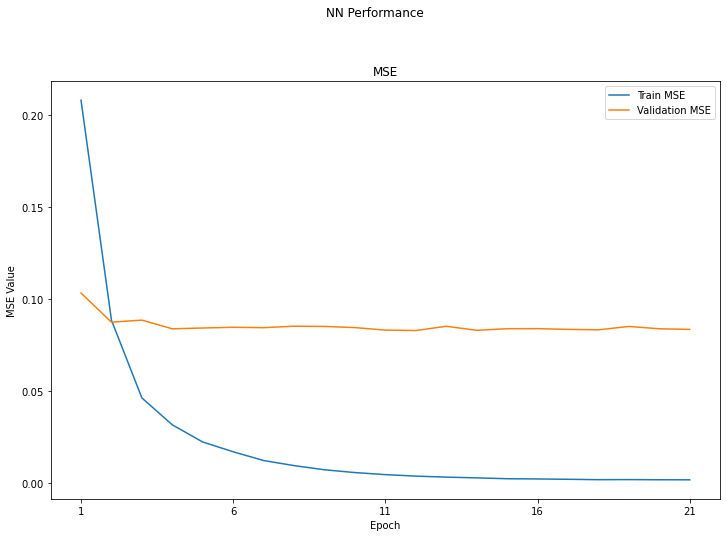

In [41]:
history1 = results_list[0]
plot_loss(history1)

Above plot shows that the training loss decreases rapidly and the validation loss levels out even as the epoch increases. We can use any epoch, even as low as 1. Our data size is small, and it does make sense to use a smaller epoch value as well.